# Keyword Generation for your SEM Campaign


In [4]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import advertools as adv


instructors_page = 'https://www.datacamp.com/instructors?all=true'
instructor_link_selector = '.instructor-block__description .instructor-block__link' # CSS class of the link
instructor_name_selector = '.dc-u-mb-12'  # CSS class of the name

headers =  {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
   'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
   'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
   'Accept-Encoding': 'none',
   'Accept-Language': 'en-US,en;q=0.8',
   'Connection': 'keep-alive'}


req = Request(instructors_page,headers=headers)
page = urlopen(req)
soup = BeautifulSoup(page, "lxml")

instructor_urls = [url['href'] for url in soup.select(instructor_link_selector)]
instructor_names = [name.text.strip() for name in soup.select(instructor_name_selector)]
instructor_urls = ['https://www.datacamp.com' + url for url in instructor_urls]

instructor_df = pd.DataFrame({
    'name': instructor_names,
    'url': instructor_urls
})
print(instructor_df.shape)
instructor_df.head()

(268, 2)


,name,url
0,Hugo Bowne-Anderson,https://www.datacamp.com/instructors/hugobowne
1,Izzy Weber,https://www.datacamp.com/instructors/izzyweber...
2,Sara Billen,https://www.datacamp.com/instructors/sara-billen
3,Lis Sulmont,https://www.datacamp.com/instructors/lis-sulmont
4,Hadrien Lacroix,https://www.datacamp.com/instructors/hadrien-d...


# 1. Generate Keywords

In [5]:
col_names = ['Campaign', 'Ad Group', 'Keyword', 'Criterion Type']
instructor_keywords = []

words = ['course', 'courses', 'learn', 'data science', 'data camp', 'datacamp']
match_types = ['Exact', 'Phrase', 'Broad']
for instructor in instructor_df['name']:
    for word in words:
        for match in match_types:
            if match == 'Broad':
                keyword = '+' + ' +'.join([instructor.replace(' ', ' +').lower(), word])  # modified broach match
            else:
                keyword = instructor.lower() + ' ' + word
            row = ['SEM_Instructors',  # campaign name
                   instructor,  # ad group name
                   keyword, # instructor <keyword>
                   match]  # keyword match type
            instructor_keywords.append(row)

# do the same by having the keywords come before the instructor name
for instructor in instructor_df['name']:
    for word in words:
        for match in match_types:
            if match == 'Broad':
                keyword = '+' + ' +'.join([word, instructor.replace(' ', ' +').lower()])
            else:
                keyword = word + ' ' + instructor.lower() 
            row = ['SEM_Instructors',  # campaign name
                   instructor,  # ad group name
                   keyword, # <keyword> instructor 
                   match]  # keyword match type
            instructor_keywords.append(row)


instructor_keywords_df = pd.DataFrame.from_records(instructor_keywords, 
                                                   columns=col_names)
print('total keywords:', instructor_keywords_df.shape[0])
instructor_keywords_df.head()

total keywords: 9648


,Campaign,Ad Group,Keyword,Criterion Type
0,SEM_Instructors,Hugo Bowne-Anderson,hugo bowne-anderson course,Exact
1,SEM_Instructors,Hugo Bowne-Anderson,hugo bowne-anderson course,Phrase
2,SEM_Instructors,Hugo Bowne-Anderson,+hugo +bowne-anderson +course,Broad
3,SEM_Instructors,Hugo Bowne-Anderson,hugo bowne-anderson courses,Exact
4,SEM_Instructors,Hugo Bowne-Anderson,hugo bowne-anderson courses,Phrase


In [6]:
topics = ['Data Science', 'Machine Learning']
keywords = ['course', 'tutorial']
adv.kw_generate(topics, keywords).head(10)

,Campaign,Ad Group,Keyword,Criterion Type,Labels
0,SEM_Campaign,Data Science,Data Science course,Exact,Course
1,SEM_Campaign,Data Science,Data Science course,Phrase,Course
2,SEM_Campaign,Data Science,+Data +Science +course,Broad,Course
3,SEM_Campaign,Data Science,Data Science tutorial,Exact,Tutorial
4,SEM_Campaign,Data Science,Data Science tutorial,Phrase,Tutorial
5,SEM_Campaign,Data Science,+Data +Science +tutorial,Broad,Tutorial
6,SEM_Campaign,Data Science,course Data Science,Exact,Course
7,SEM_Campaign,Data Science,course Data Science,Phrase,Course
8,SEM_Campaign,Data Science,+course +Data +Science,Broad,Course
9,SEM_Campaign,Data Science,tutorial Data Science,Exact,Tutorial


In [7]:
topics = ['R', 'Python', 'SQL', 'Git', 'Shell']  # listed on the /courses page
keywords = ['data science', 'programming', 'analytics', 'data analysis', 'machine learning',
            'deep learning', 'financial analysis', 'data viz', 'visualization', 'data visualization',
            'learn', 'course', 'courses', 'education', 'data import', 'data cleaning', 
            'data manipulation', 'probability', 'stats', 'statistics', 'course', 'courses',
           'learn', 'education', 'tutorial']  # @marketing_team: this list can / should be refined or 
                                              # expanded based on the strategy and how specific the 
                                              # targeting needs to be
tech_keywords = adv.kw_generate(topics, keywords, campaign_name='SEM_Technologies')
print('total keywords:', tech_keywords.shape[0])
tech_keywords.head()

total keywords: 27750


,Campaign,Ad Group,Keyword,Criterion Type,Labels
0,SEM_Technologies,R,R data science,Exact,Data Science
1,SEM_Technologies,R,R data science,Phrase,Data Science
2,SEM_Technologies,R,+R +data +science,Broad,Data Science
3,SEM_Technologies,R,R programming,Exact,Programming
4,SEM_Technologies,R,R programming,Phrase,Programming


# 2. Generating Course Keywords

In [8]:
courses_page = 'https://www.datacamp.com/courses-all'
course_link_selector = '.css-x0dcn5-HitCard'


headers =  {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
   'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
   'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
   'Accept-Encoding': 'none',
   'Accept-Language': 'en-US,en;q=0.8',
   'Connection': 'keep-alive'}

req = Request(courses_page,headers=headers)
page = urlopen(req)
soup = BeautifulSoup(page, "lxml")


course_urls = [url['href'] for url in soup.select(course_link_selector)] 
course_urls = ['https://www.datacamp.com' + url for url in course_urls]
course_names = [link.text for link in soup.select(course_link_selector)]


course_df = pd.DataFrame({
    'name': course_names,
    'url': course_urls
})
course_df['name_clean'] = course_df.name.str.replace('\(.*\)', '').str.strip()  # remove (part x)
print('total keywords:', course_df.shape[0])
course_df.head()

keywords = ['', 'learn', 'course', 'courses', 'tutorial', 'education']
course_keywords = adv.kw_generate(course_df['name_clean'], keywords, campaign_name='SEM_Courses')
print('total keywords:', course_keywords.shape[0])
course_keywords.head(10)

total keywords: 30
total keywords: 9180


<ipython-input-8-8bb53650fcd6>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  course_df['name_clean'] = course_df.name.str.replace('\(.*\)', '').str.strip()  # remove (part x)


,Campaign,Ad Group,Keyword,Criterion Type,Labels
0,SEM_Courses,Introduction To Python,Introduction to Python,Exact,
1,SEM_Courses,Introduction To Python,Introduction to Python,Phrase,
2,SEM_Courses,Introduction To Python,+Introduction +to +Python +,Broad,
3,SEM_Courses,Introduction To Python,Introduction to Python learn,Exact,Learn
4,SEM_Courses,Introduction To Python,Introduction to Python learn,Phrase,Learn
5,SEM_Courses,Introduction To Python,+Introduction +to +Python +learn,Broad,Learn
6,SEM_Courses,Introduction To Python,Introduction to Python course,Exact,Course
7,SEM_Courses,Introduction To Python,Introduction to Python course,Phrase,Course
8,SEM_Courses,Introduction To Python,+Introduction +to +Python +course,Broad,Course
9,SEM_Courses,Introduction To Python,Introduction to Python courses,Exact,Courses


In [9]:
career_page = 'https://www.datacamp.com/tracks/career'
career_name_selector = '.css-so6h6r-TrackCard'
techology_name_selector = '.css-lls7o5'


headers =  {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
   'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
   'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
   'Accept-Encoding': 'none',
   'Accept-Language': 'en-US,en;q=0.8',
   'Connection': 'keep-alive'}

req = Request(career_page,headers=headers)
page = urlopen(req)
soup = BeautifulSoup(page, "lxml")
#display(soup)

career_names = [link.text for link in soup.select(career_name_selector)]
career_urls = ['https://www.datacamp.com' + '/' + url.lower().replace(' ','-') for url in career_names]

tracks_df = pd.DataFrame({
    'name': career_names,
    'url': career_urls
})
tracks_df['name'] = [x.title() for x in tracks_df['name']]
tracks_df.head()

,name,url
0,Data Analyst,https://www.datacamp.com/data-analyst-
1,Data Scientist,https://www.datacamp.com/data-scientist
2,Data Analyst,https://www.datacamp.com/data-analyst-
3,Data Scientist,https://www.datacamp.com/data-scientist-
4,Python Programmer,https://www.datacamp.com/python-programmer


In [10]:
full_keywords_df = pd.concat([instructor_keywords_df, tech_keywords, course_keywords])
full_keywords_df.drop("Labels", axis=1, inplace=True)
print('total keywords:', full_keywords_df.shape[0])
print('total campaigns:', len(set(full_keywords_df['Campaign'])))
print('total ad groups:', len(set(full_keywords_df['Ad Group'])))
full_keywords_df.to_csv('keywords.csv', index=False)
full_keywords_df.head()

total keywords: 46578
total campaigns: 3
total ad groups: 301


,Campaign,Ad Group,Keyword,Criterion Type
0,SEM_Instructors,Hugo Bowne-Anderson,hugo bowne-anderson course,Exact
1,SEM_Instructors,Hugo Bowne-Anderson,hugo bowne-anderson course,Phrase
2,SEM_Instructors,Hugo Bowne-Anderson,+hugo +bowne-anderson +course,Broad
3,SEM_Instructors,Hugo Bowne-Anderson,hugo bowne-anderson courses,Exact
4,SEM_Instructors,Hugo Bowne-Anderson,hugo bowne-anderson courses,Phrase


# Ad Generation and Copy Writing

2022-10-03 13:33:46,934 | INFO | utils.py:157 | _init_num_threads | NumExpr defaulting to 8 threads.


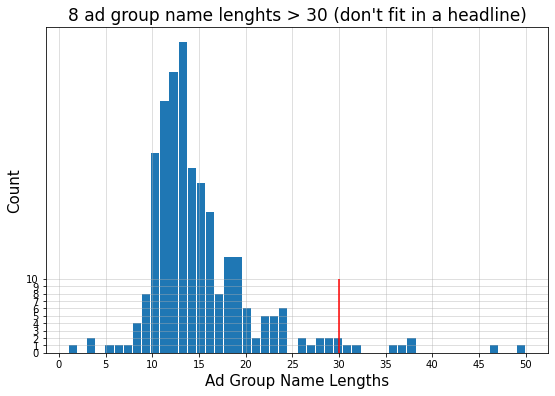

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
adgroup_lengths = pd.Series([len(adgrp) for adgrp in full_keywords_df['Ad Group'].unique()])
long_adgroups = sum(adgroup_lengths > 30)
plt.figure(figsize=(9,6))
plt.hist(adgroup_lengths, rwidth=0.9, bins=50)
plt.vlines(x=30, ymin=0, ymax=10, colors='red')
plt.title(str(long_adgroups) + ' ad group name lenghts > 30 (don\'t fit in a headline)',  fontsize=17)
plt.xlabel('Ad Group Name Lengths', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.yticks(range(11))
plt.xticks(range(0, 51, 5))
plt.grid(alpha=0.5)
plt.show()

In [ ]:
full_keywords_df.Campaign.unique()  # just to make sure you have consistent naming conventions


In [12]:
course_df['Campaign'] = 'SEM_Courses'
course_df = course_df.rename(columns={'name_clean': 'name', 'name': 'old_name'})
course_df.head()

,old_name,url,name,Campaign
0,Introduction to Python,https://www.datacamp.com/courses/intro-to-pyth...,Introduction to Python,SEM_Courses
1,Introduction to SQL,https://www.datacamp.com/courses/introduction-...,Introduction to SQL,SEM_Courses
2,Introduction to R,https://www.datacamp.com/courses/free-introduc...,Introduction to R,SEM_Courses
3,Intermediate Python,https://www.datacamp.com/courses/intermediate-...,Intermediate Python,SEM_Courses
4,Introduction to Data Science in Python,https://www.datacamp.com/courses/introduction-...,Introduction to Data Science in Python,SEM_Courses


In [13]:
instructor_df['Campaign'] = 'SEM_Instructors'
instructor_df.head()

,name,url,Campaign
0,Hugo Bowne-Anderson,https://www.datacamp.com/instructors/hugobowne,SEM_Instructors
1,Izzy Weber,https://www.datacamp.com/instructors/izzyweber...,SEM_Instructors
2,Sara Billen,https://www.datacamp.com/instructors/sara-billen,SEM_Instructors
3,Lis Sulmont,https://www.datacamp.com/instructors/lis-sulmont,SEM_Instructors
4,Hadrien Lacroix,https://www.datacamp.com/instructors/hadrien-d...,SEM_Instructors


In [14]:
tech_domain = 'https://www.datacamp.com/courses/tech:'
tech_domain_list = []
for tech in ['R', 'Python', 'SQL', 'Git', 'Shell']:
    tech_domain_list.append((tech, tech_domain + tech))
tech_df = pd.DataFrame.from_records(tech_domain_list, columns=['name', 'url'])
tech_df['Campaign'] = 'SEM_Technologies'
tech_df

,name,url,Campaign
0,R,https://www.datacamp.com/courses/tech:R,SEM_Technologies
1,Python,https://www.datacamp.com/courses/tech:Python,SEM_Technologies
2,SQL,https://www.datacamp.com/courses/tech:SQL,SEM_Technologies
3,Git,https://www.datacamp.com/courses/tech:Git,SEM_Technologies
4,Shell,https://www.datacamp.com/courses/tech:Shell,SEM_Technologies


In [16]:
full_ads_df = pd.concat([course_df[['Campaign', 'name', 'url']],
                        instructor_df,
                        tracks_df,
                        tech_df], ignore_index=True)
full_ads_df = full_ads_df.rename(columns={'name': 'Ad Group', 'url': 'Final URL'})
print('total rows:', full_ads_df.shape[0])
n_adgroups = full_ads_df.shape[0]
full_ads_df.head()

total rows: 317


,Campaign,Ad Group,Final URL
0,SEM_Courses,Introduction to Python,https://www.datacamp.com/courses/intro-to-pyth...
1,SEM_Courses,Introduction to SQL,https://www.datacamp.com/courses/introduction-...
2,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...
3,SEM_Courses,Intermediate Python,https://www.datacamp.com/courses/intermediate-...
4,SEM_Courses,Introduction to Data Science in Python,https://www.datacamp.com/courses/introduction-...


# Generate Ads

In [17]:
full_ads_df = full_ads_df.iloc[[x  for x in range(n_adgroups) for i in range(3)], :] 
print('total rows:', full_ads_df.shape[0])
full_ads_df.head(9)

total rows: 951


,Campaign,Ad Group,Final URL
0,SEM_Courses,Introduction to Python,https://www.datacamp.com/courses/intro-to-pyth...
0,SEM_Courses,Introduction to Python,https://www.datacamp.com/courses/intro-to-pyth...
0,SEM_Courses,Introduction to Python,https://www.datacamp.com/courses/intro-to-pyth...
1,SEM_Courses,Introduction to SQL,https://www.datacamp.com/courses/introduction-...
1,SEM_Courses,Introduction to SQL,https://www.datacamp.com/courses/introduction-...
1,SEM_Courses,Introduction to SQL,https://www.datacamp.com/courses/introduction-...
2,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...
2,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...
2,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...


In [18]:
Description = [
    'Learn Directly From the Top Experts in the Field. 20% off Annual Subcriptions',
    'Be Ahead of the Curve, Master Data Science Skills. $29 / Month. Cancel Anytime',
    'Choose From a Wide Variety of Topics Tuaght by the Best in the World. Start Now'   
]
Description = [x for i in range(n_adgroups) for x in Description ]
full_ads_df['Description'] = Description
full_ads_df.head()

,Campaign,Ad Group,Final URL,Description
0,SEM_Courses,Introduction to Python,https://www.datacamp.com/courses/intro-to-pyth...,Learn Directly From the Top Experts in the Fie...
0,SEM_Courses,Introduction to Python,https://www.datacamp.com/courses/intro-to-pyth...,"Be Ahead of the Curve, Master Data Science Ski..."
0,SEM_Courses,Introduction to Python,https://www.datacamp.com/courses/intro-to-pyth...,Choose From a Wide Variety of Topics Tuaght by...
1,SEM_Courses,Introduction to SQL,https://www.datacamp.com/courses/introduction-...,Learn Directly From the Top Experts in the Fie...
1,SEM_Courses,Introduction to SQL,https://www.datacamp.com/courses/introduction-...,"Be Ahead of the Curve, Master Data Science Ski..."


In [19]:
benefits = [
    'Boost Your Data Science Career',
    'Stand Out From the Crowd',
    'Tackle Complex Questions'    
]

In [21]:
benefits = [x for i in range(n_adgroups) for x in benefits]
headlines = [adv.ad_from_string(x) for x in full_ads_df['Ad Group']]
full_ads_df['Headline 1'] = [x[0] for x in headlines]
full_ads_df['Headline 2'] = [x[1] if x[1] else benefits[i] for i, x in enumerate(headlines)]
print('total ads:', full_ads_df.shape[0])
full_ads_df.head(9)


total ads: 951


,Campaign,Ad Group,Final URL,Description,Headline 1,Headline 2
0,SEM_Courses,Introduction to Python,https://www.datacamp.com/courses/intro-to-pyth...,Learn Directly From the Top Experts in the Fie...,Introduction to Python,Boost Your Data Science Career
0,SEM_Courses,Introduction to Python,https://www.datacamp.com/courses/intro-to-pyth...,"Be Ahead of the Curve, Master Data Science Ski...",Introduction to Python,Stand Out From the Crowd
0,SEM_Courses,Introduction to Python,https://www.datacamp.com/courses/intro-to-pyth...,Choose From a Wide Variety of Topics Tuaght by...,Introduction to Python,Tackle Complex Questions
1,SEM_Courses,Introduction to SQL,https://www.datacamp.com/courses/introduction-...,Learn Directly From the Top Experts in the Fie...,Introduction to SQL,Boost Your Data Science Career
1,SEM_Courses,Introduction to SQL,https://www.datacamp.com/courses/introduction-...,"Be Ahead of the Curve, Master Data Science Ski...",Introduction to SQL,Stand Out From the Crowd
1,SEM_Courses,Introduction to SQL,https://www.datacamp.com/courses/introduction-...,Choose From a Wide Variety of Topics Tuaght by...,Introduction to SQL,Tackle Complex Questions
2,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...,Learn Directly From the Top Experts in the Fie...,Introduction to R,Boost Your Data Science Career
2,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...,"Be Ahead of the Curve, Master Data Science Ski...",Introduction to R,Stand Out From the Crowd
2,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...,Choose From a Wide Variety of Topics Tuaght by...,Introduction to R,Tackle Complex Questions


In [25]:
full_ads_df.to_csv('ads.csv', index=False)